# UMAP
## Determining whether UMAP improves cluster solutions

This script explores whether implementing UMAP (instead of PCA) improves the cluster solutions obtained by HDBSCAN and K-means.

## Libraries Used

In [1]:
import umap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import hdbscan
from sklearn.cluster import KMeans
from itertools import product
import os

In [2]:
BASE_DIR = '../..'
DATA_DIR = os.path.join(BASE_DIR, 'data')
FEATURES_DIR = os.path.join(DATA_DIR, "extracted_features")

## Reading in all extracted features

In [3]:
df = pd.read_csv(os.path.join(FEATURES_DIR, "all_features.csv"))
df_labels = df.drop(df.columns[3:4099], axis=1) # creating labels for csv file later on
df_labels = df_labels.drop(df_labels.columns[0], axis=1)

df = df.drop([df.columns[0], "Municipality", "ward_no."], axis=1) #remove columns that serves as index and naming columns


print(df.shape) #the dataframe is 508 rows (wards) and 4096 columns (features)
df.head()

(508, 4096)


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,-0.720134,-0.011752,-0.196956,-0.188181,-0.185301,-0.589358,0.190067,-0.182576,0.661260,-0.066985,...,-0.383296,-0.362654,0.125460,0.021607,-0.279668,-0.002370,-0.097725,0.340595,-0.005517,-1.081248
1,-0.648677,0.196469,-0.046444,-0.203042,0.077324,-0.685668,-0.128859,-0.162891,0.463626,-0.011447,...,-0.434731,-0.222764,0.109085,0.066180,0.099601,-0.421368,-0.092743,0.219308,0.142782,-0.888951
2,-0.779101,0.049304,0.334525,-0.348373,-0.081809,-0.724423,-0.346990,-0.049666,0.461621,-0.172035,...,-0.457215,-0.106087,-0.066711,0.066039,-0.171572,-0.420311,-0.069101,0.332208,0.233605,-0.915926
3,-0.601808,-0.065139,0.147482,-0.336250,-0.109590,-0.644383,-0.399426,-0.101277,0.605497,-0.129905,...,-0.391497,-0.179220,0.148247,0.168646,-0.220085,-0.264893,-0.330374,0.462983,0.028194,-0.952793
4,-1.026684,-0.286151,0.411765,-0.535642,-0.197247,-0.962774,-0.467955,-0.328909,1.164673,-0.186016,...,-0.445696,-0.170309,-0.023123,0.089037,-0.367245,-0.257600,-0.490463,0.609728,0.084688,-1.292101


## UMAP Embedding

We will use an 18-dimensional UMAP embedding of the full feature set.

In [4]:
clusterable_embedding = umap.UMAP(
    n_neighbors=30, # 30
    min_dist=0.0,
    n_components=18,
    random_state=42,
).fit_transform(df)

In [5]:
# Converting to Data Frame
X = pd.DataFrame(clusterable_embedding)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,6.314995,4.349174,3.266186,5.509706,5.274659,6.432049,5.591256,4.645926,6.961758,3.834292,4.460970,7.827258,6.121856,5.046837,5.125311,4.626855,4.997023,6.170087
1,5.304955,4.965321,3.315800,5.462599,5.464440,6.292080,5.108047,3.821249,6.252724,3.903327,3.681150,8.596388,6.227995,4.358994,5.534655,4.470030,4.821062,5.936026
2,4.711304,4.480486,3.213601,5.526309,5.443814,6.510221,5.382390,3.895565,6.680025,3.844407,4.038368,8.454576,6.194681,4.728136,5.341722,4.637443,4.850914,6.201463
3,5.150460,4.119630,2.988060,5.650910,5.319744,6.662979,5.693005,4.223396,7.152916,3.671922,4.391577,8.143738,6.301621,5.080159,5.089032,4.965644,4.850440,6.407445
4,3.633459,3.965527,3.853211,5.069583,5.413174,6.260776,5.349054,4.165962,6.494946,4.379282,4.579310,8.117580,5.701000,4.827541,5.210605,4.143397,5.334149,6.358743


In [6]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,5.473301,4.368595,3.301201,5.466588,5.362729,6.457260,5.492744,4.330193,6.806545,3.897848,4.315485,8.093871,6.097033,4.930600,5.230710,4.577240,4.971799,6.191308
std,1.347734,0.490244,0.626952,0.432556,0.150082,0.273662,0.362684,0.436942,0.641649,0.498324,0.497571,0.411179,0.431704,0.412648,0.274927,0.598054,0.372484,0.262406
min,3.252887,3.309283,1.941026,4.762172,5.034514,5.957470,4.805873,3.562662,5.689538,2.883665,3.614684,7.213278,5.338813,4.131970,4.731877,3.709494,4.265966,5.672571
25%,4.186363,4.046377,2.787021,5.091955,5.256303,6.261646,5.190482,3.937669,6.285115,3.463332,3.914337,7.870715,5.813118,4.586773,4.999656,4.083310,4.686828,5.973746
50%,5.413874,4.383998,3.403753,5.436146,5.373076,6.418255,5.515039,4.353928,6.743125,3.950818,4.250799,8.091477,6.048952,4.940041,5.247372,4.427861,4.932648,6.205697
75%,6.799480,4.768923,3.797462,5.854803,5.483555,6.686775,5.718076,4.651045,7.213283,4.323079,4.532915,8.419605,6.435158,5.269433,5.467515,4.999418,5.205099,6.381706
max,7.786808,5.203039,4.264141,6.331820,5.693977,7.058320,6.203522,5.109313,8.130999,4.733210,5.566291,8.802075,7.040133,5.661546,5.743824,5.969975,5.784859,6.715806


In [7]:
# Set scale = True if standardizing the features is required
scale = False
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X)) if scale else X
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,6.314995,4.349174,3.266186,5.509706,5.274659,6.432049,5.591256,4.645926,6.961758,3.834292,4.460970,7.827258,6.121856,5.046837,5.125311,4.626855,4.997023,6.170087
1,5.304955,4.965321,3.315800,5.462599,5.464440,6.292080,5.108047,3.821249,6.252724,3.903327,3.681150,8.596388,6.227995,4.358994,5.534655,4.470030,4.821062,5.936026
2,4.711304,4.480486,3.213601,5.526309,5.443814,6.510221,5.382390,3.895565,6.680025,3.844407,4.038368,8.454576,6.194681,4.728136,5.341722,4.637443,4.850914,6.201463
3,5.150460,4.119630,2.988060,5.650910,5.319744,6.662979,5.693005,4.223396,7.152916,3.671922,4.391577,8.143738,6.301621,5.080159,5.089032,4.965644,4.850440,6.407445
4,3.633459,3.965527,3.853211,5.069583,5.413174,6.260776,5.349054,4.165962,6.494946,4.379282,4.579310,8.117580,5.701000,4.827541,5.210605,4.143397,5.334149,6.358743


We will now investigate whether UMAP improves the cluster solutions, starting with HDBSCAN

## HDBSCAN

In [8]:
min_cluster_sizes = np.arange(5, 50, 1)
min_samples = np.arange(2, 30, 1) 
hdbscan_params = list(product(min_cluster_sizes, min_samples))
no_of_clusters = []
sil_score = []
dbcv_score = []
davies_score = []
min_cluster_size = []
min_sample = []
non_noise = []
for p in hdbscan_params:
    hdbscan_cluster = hdbscan.HDBSCAN(min_cluster_size=p[0].item(), gen_min_span_tree=True, metric = "euclidean", min_samples=p[1].item()).fit(X_scaled)
    min_cluster_size.append(p[0])
    min_sample.append(p[1])
    no_of_clusters.append(len(np.unique(hdbscan_cluster.labels_)))
    non_noise.append(sum(hdbscan_cluster.labels_ != -1))
    dbcv_score.append(hdbscan_cluster.relative_validity_)
    try:
        sil_score.append(silhouette_score(X_scaled[hdbscan_cluster.labels_ != -1], hdbscan_cluster.labels_[hdbscan_cluster.labels_ != -1]) * sum(hdbscan_cluster.labels_ != -1)/df.shape[0])
        davies_score.append(davies_bouldin_score(X_scaled[hdbscan_cluster.labels_ != -1], hdbscan_cluster.labels_[hdbscan_cluster.labels_ != -1]) * sum(hdbscan_cluster.labels_ != -1)/df.shape[0])
    except ValueError:     
        sil_score.append(0)
        davies_score.append(0)
res = list(zip(no_of_clusters, sil_score, dbcv_score, davies_score, min_cluster_size, min_sample, non_noise))
res_df_18 = pd.DataFrame(res, columns=['no_of_clusters', 'silhouette_score', 'dbcv_score', 'davies_score', 'min_cluster_size', 'min_samples', 'non_noise'])
res_df_18.sort_values(by=['dbcv_score'], inplace=True, ascending=False)
res_df_18

,no_of_clusters,silhouette_score,dbcv_score,davies_score,min_cluster_size,min_samples,non_noise
315,6,0.391493,0.510405,0.571403,16,9,469
595,5,0.402459,0.502493,0.572963,26,9,453
343,5,0.402459,0.502493,0.572963,17,9,453
399,5,0.402459,0.502493,0.572963,19,9,453
511,5,0.402459,0.502493,0.572963,23,9,453
...,...,...,...,...,...,...,...
988,4,0.446595,0.001204,0.661847,40,10,476
1212,4,0.446595,0.001204,0.661847,48,10,476
1184,4,0.446595,0.001204,0.661847,47,10,476
904,4,0.446595,0.001204,0.661847,37,10,476


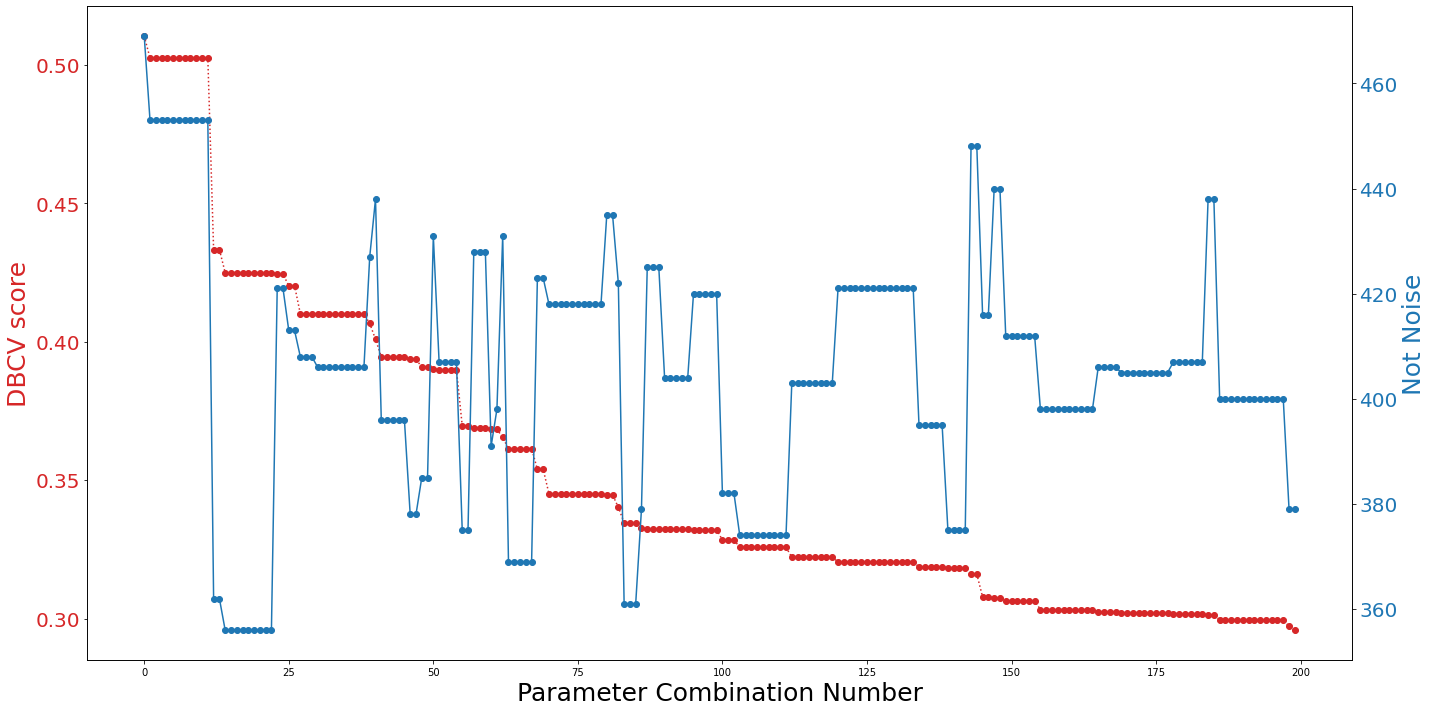

In [10]:
# plotting the DBCV score vs the number of wards not assigned as noise.

fig, ax1 = plt.subplots(figsize=(20, 10))

color = 'tab:red'
ax1.set_xlabel('Parameter Combination Number', fontsize=25)
ax1.set_ylabel('DBCV score', color=color, fontsize=25)
ax1.plot(np.arange(200), res_df_18['dbcv_score'][:200], color=color, linestyle=':', marker='o')
ax1.tick_params(axis='y', labelcolor=color, labelsize=20)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Not Noise', color=color, fontsize=25) 
ax2.plot(np.arange(200), res_df_18['non_noise'][:200], color=color, linestyle='-', marker='o')
ax2.tick_params(axis='y', labelcolor=color, labelsize=20)

y_points = [210, 233, 233, 233]
x_points = [3, 38, 56, 74]

fig.tight_layout()  # otherwise the right y-label is slightly clipped


plt.show()

### Max DBCV

Looking at the higher DBCV scores and number of wards assigned to the clusters, it seems that UMAP has **improved** the clusters for HDBSCAN.

In [11]:
res_df_18[res_df_18['dbcv_score'] > 0.5]

,no_of_clusters,silhouette_score,dbcv_score,davies_score,min_cluster_size,min_samples,non_noise
315,6,0.391493,0.510405,0.571403,16,9,469
595,5,0.402459,0.502493,0.572963,26,9,453
343,5,0.402459,0.502493,0.572963,17,9,453
399,5,0.402459,0.502493,0.572963,19,9,453
511,5,0.402459,0.502493,0.572963,23,9,453
427,5,0.402459,0.502493,0.572963,20,9,453
371,5,0.402459,0.502493,0.572963,18,9,453
539,5,0.402459,0.502493,0.572963,24,9,453
567,5,0.402459,0.502493,0.572963,25,9,453
455,5,0.402459,0.502493,0.572963,21,9,453


Examining one of the top solutions further:

In [12]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=16, min_samples=9, gen_min_span_tree=True, metric = "euclidean")
clusterer.fit(X_scaled)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=16, min_samples=9)

In [13]:
for i in set(clusterer.labels_):
    print(f'Cluser {i} has {sum(clusterer.labels_ ==i)} wards')

Cluser 0 has 16 wards
Cluser 1 has 158 wards
Cluser 2 has 227 wards
Cluser 3 has 41 wards
Cluser 4 has 27 wards
Cluser -1 has 39 wards


It appears that the clusters have a larger number of wards within them.

In [14]:
df_cluster = pd.concat([df_labels, pd.DataFrame(clusterer.labels_, columns=["Cluster"])], axis=1, sort=False)
df_cluster.head()

,ward_no.,Municipality,Cluster
0,1,Emfuleni,2
1,2,Emfuleni,1
2,3,Emfuleni,1
3,4,Emfuleni,2
4,5,Emfuleni,-1


Thus, it appears that UMAP improved the HDBSCAN clusters. But what about K-means?

## K-means

In [24]:
ks = range(2, 15)
inertias = []
sil = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, init='k-means++')
    
    # Fit model to samples
    model.fit(X_scaled)
    kmeans_model = KMeans(init='k-means++', n_clusters=k, n_init=10).fit(X_scaled)
    labels = kmeans_model.labels_
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
    #Append sillhouette scores
    sil.append(silhouette_score(X_scaled, labels, metric='euclidean'))

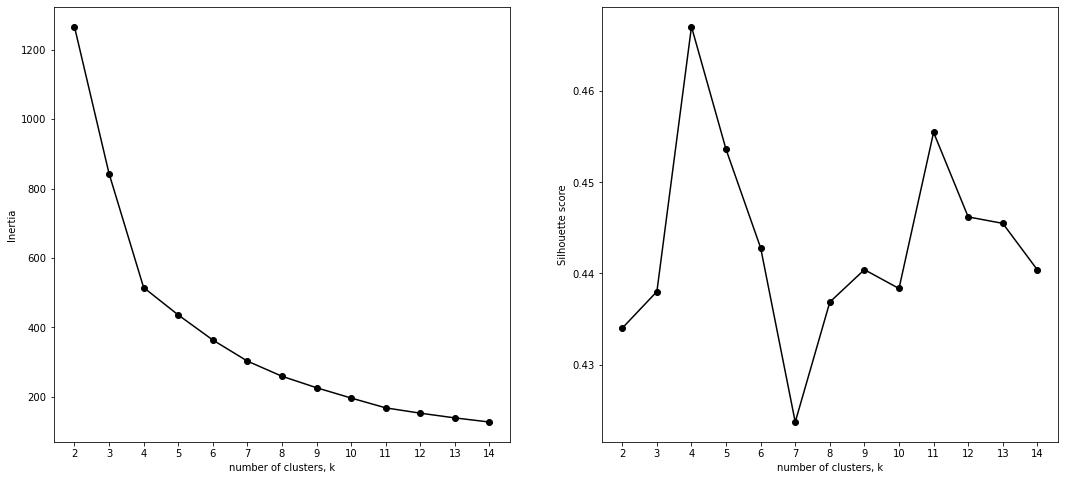

In [25]:
#both inertia and sil
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
ax[0].plot(ks, inertias, '-o', color='black')
ax[0].set_xlabel('number of clusters, k')
ax[0].set_ylabel('Inertia')
ax[0].set_xticks(ks)

ax[1].plot(ks, sil, '-o', color='black')
ax[1].set_xlabel('number of clusters, k')
ax[1].set_ylabel('Silhouette score')
ax[1].set_xticks(ks)

plt.show()

The maximum silhouette score is considerably higher at K=4. Furthermore, there is a clear elbow in the graph at K=4. All of the silhouette scores obtained are higher than those obtained using PCA.

## Conclusion

It is evident that UMAP improved the cluster solutions (based on the internal validation metrics used). However, from plotting these solutions, it appeared that they simply clustered nightlights better, as opposed to poverty.